<a href="https://colab.research.google.com/github/yankit247/Different-Machine-Learning-Models/blob/main/Leaf_Area_Index_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
pip install rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 45.4 MB/s eta 0:00:00


In [3]:
pip install laspy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 11.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for laspy: filename=laspy-2.5.1-py3-none-any.whl size=74909 sha256=84c9a77b016ed8fa1353753892f8234250af70da619f8a30caf17558b99f2122
  Stored in directory: /root/.cache/pip/wheels/04/ac/59/c76552f21ad08a44341a9cf0f7d0a7b1f5cebcfb0bb8d32265
Successfully built laspy


In [4]:
import numpy as np
import laspy
import math

def calculate_lpi(lidar_file):
    # Read the LiDAR data
    lidar = laspy.read(lidar_file)

    # Classify ground and non-ground points
    ground_points = lidar.points[lidar.classification == 2]
    non_ground_points = lidar.points[lidar.classification != 2]

    # Calculate the number of ground returns per unit area
    mG = len(ground_points)

    # Calculate the number of vegetation returns per unit area
    mV = len(non_ground_points)

    # Calculate LPI
    lpi = mG / (mG + mV)

    return lpi

# Example usage
lpi = calculate_lpi('/content/drive/MyDrive/vegetation_ground.las')
print(f'Laser Penetration Index: {lpi}')

# Now calculate ACI and LAI using the returned value from calculate_lpi

# Read the LiDAR data again to access the points
lidar = laspy.read('/content/drive/MyDrive/vegetation_ground.las')

# Total number of returns (ground + non-ground)
total_returns = len(lidar.points)

# Number of non-ground returns (vegetation returns)
non_ground_points = lidar.points[lidar.classification != 2]
non_ground_returns = len(non_ground_points)

aci = non_ground_returns / total_returns  # ACI calculation
print(f'All echo cover index: {aci}')

k = 0.5   # Example extinction coefficient

gap_fraction = 1 - aci
lai = -math.log(gap_fraction) / k

print(f"Leaf Area Index (LAI): {lai}")


Laser Penetration Index: 0.8382437427156066
All echo cover index: 0.16175625728439338
Leaf Area Index (LAI): 0.3528927167264097


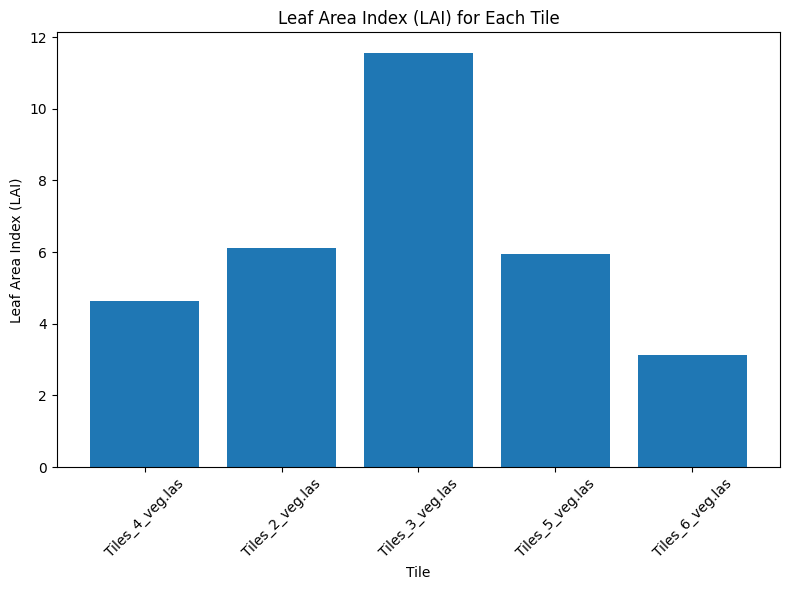

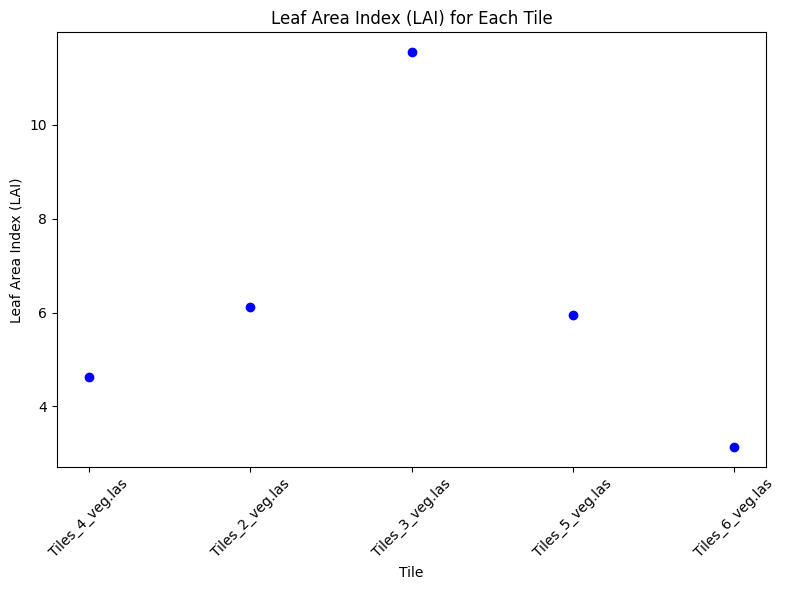

In [5]:
import numpy as np
import laspy
import math
import os
import matplotlib.pyplot as plt

def calculate_lpi(lidar_file):
    # Read the LiDAR data
    lidar = laspy.read(lidar_file)

    # Classify ground and non-ground points
    ground_points = lidar.points[lidar.classification == 2]
    non_ground_points = lidar.points[lidar.classification != 2]

    # Calculate the number of ground returns per unit area
    mG = len(ground_points)

    # Calculate the number of vegetation returns per unit area
    mV = len(non_ground_points)

    # Calculate LPI
    lpi = mG / (mG + mV)

    return lpi

def calculate_lai(lidar_file):
    lidar = laspy.read(lidar_file)

    # Total number of returns (ground + non-ground)
    total_returns = len(lidar.points)

    # Number of non-ground returns (vegetation returns)
    non_ground_points = lidar.points[lidar.classification != 2]
    non_ground_returns = len(non_ground_points)

    aci = non_ground_returns / total_returns  # ACI calculation

    k = 0.5   # Example extinction coefficient
    gap_fraction = 1 - aci
    lai = -math.log(gap_fraction) / k

    return lai

def process_tiles(tile_folder):
    # Get a list of LiDAR files in the tile_folder
    lidar_files = [file for file in os.listdir(tile_folder) if file.endswith('.las')]

    # Initialize lists to store LPI and LAI values for each tile
    lpi_values = []
    lai_values = []
    center_coordinates = []

    for lidar_file in lidar_files:
        lidar = laspy.read(os.path.join(tile_folder, lidar_file))
        # Calculate LPI
        lpi = calculate_lpi(os.path.join(tile_folder, lidar_file))
        lpi_values.append(lpi)

        # Calculate LAI
        lai = calculate_lai(os.path.join(tile_folder, lidar_file))
        lai_values.append(lai)

        # Calculate center x and y coordinates of the tile
        center_x = (lidar.header.min[0] + lidar.header.max[0]) / 2
        center_y = (lidar.header.min[1] + lidar.header.max[1]) / 2
        center_coordinates.append((center_x, center_y))

    # Plot the LAI values for each tile
    plt.figure(figsize=(8, 6))
    plt.bar(range(len(lai_values)), lai_values)
    plt.xlabel('Tile')
    plt.ylabel('Leaf Area Index (LAI)')
    plt.title('Leaf Area Index (LAI) for Each Tile')
    plt.xticks(range(len(lai_values)), lidar_files, rotation=45)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.scatter(range(len(lai_values)), lai_values, marker='o', color='b')
    plt.xlabel('Tile')
    plt.ylabel('Leaf Area Index (LAI)')
    plt.title('Leaf Area Index (LAI) for Each Tile')
    plt.xticks(range(len(lai_values)), lidar_files, rotation=45)
    plt.tight_layout()
    plt.show()

    # Save the LAI values for each tile to a text file
    with open('/content/drive/MyDrive/lai_values.txt', 'w') as file:
      for tile, lai in zip(os.listdir(tile_folder), lai_values):
        file.write(f'{tile}: {lai}\n')

    # Save the LAI values and center coordinates for each tile to a text file
    with open('/content/drive/MyDrive/lai_values_with_coordinates.txt', 'w') as file:
        for tile, (lai, center) in zip(lidar_files, zip(lai_values, center_coordinates)):
            file.write(f'{tile}: LAI={lai}, Center X={center[0]}, Center Y={center[1]}\n')

    return lpi_values, lai_values

    # Save the LAI values and center coordinates for each tile to a CSV file
    csv_filename = '/content/drive/MyDrive/LAI_values_with_coordinates.csv'
    with open(csv_filename, 'w', newline='') as csvfile:
        csv_writer = csv.writer(csvfile)
        csv_writer.writerow(['Tile', 'LAI', 'Center X', 'Center Y'])
        for tile, (lai, center) in zip(lidar_files, zip(lai_values, center_coordinates)):
            csv_writer.writerow([tile, lai, center[0], center[1]])

    return lpi_values, lai_values
# Example usage
tile_folder = '/content/drive/MyDrive/Tiles'
lpi_values, lai_values = process_tiles(tile_folder)


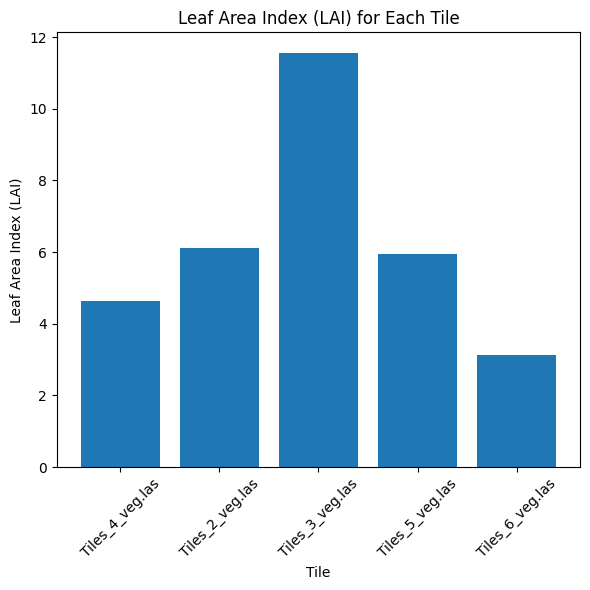

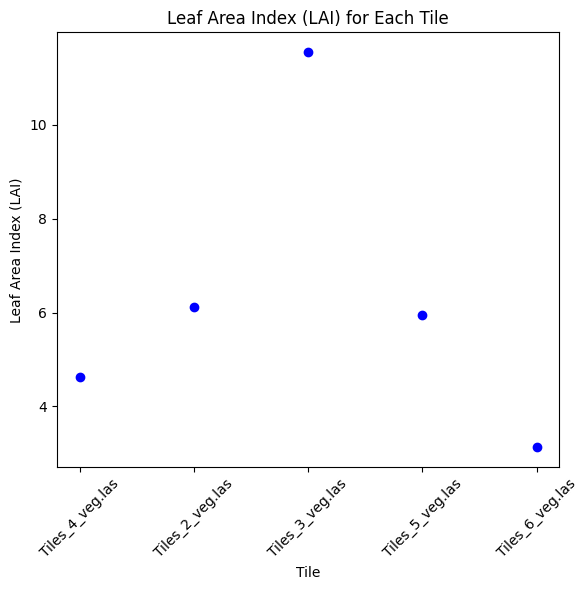

In [6]:
import numpy as np
import laspy
import math
import os
import matplotlib.pyplot as plt
import csv

def calculate_lpi(lidar_file):
    # Read the LiDAR data
    lidar = laspy.read(lidar_file)

    # Classify ground and non-ground points
    ground_points = lidar.points[lidar.classification == 2]
    non_ground_points = lidar.points[lidar.classification != 2]

    # Calculate the number of ground returns per unit area
    mG = len(ground_points)

    # Calculate the number of vegetation returns per unit area
    mV = len(non_ground_points)

    # Calculate LPI
    lpi = mG / (mG + mV)

    return lpi

def calculate_lai(lidar_file):
    lidar = laspy.read(lidar_file)

    # Total number of returns (ground + non-ground)
    total_returns = len(lidar.points)

    # Number of non-ground returns (vegetation returns)
    non_ground_points = lidar.points[lidar.classification != 2]
    non_ground_returns = len(non_ground_points)

    aci = non_ground_returns / total_returns  # ACI calculation

    k = 0.5   # Example extinction coefficient
    gap_fraction = 1 - aci
    lai = -math.log(gap_fraction) / k

    return lai

def process_tiles(tile_folder):
    # Get a list of LiDAR files in the tile_folder
    lidar_files = [file for file in os.listdir(tile_folder) if file.endswith('.las')]

    # Initialize lists to store LPI and LAI values for each tile
    lpi_values = []
    lai_values = []
    center_coordinates = []

    for lidar_file in lidar_files:
        lidar = laspy.read(os.path.join(tile_folder, lidar_file))
        # Calculate LPI
        lpi = calculate_lpi(os.path.join(tile_folder, lidar_file))
        lpi_values.append(lpi)

        # Calculate LAI
        lai = calculate_lai(os.path.join(tile_folder, lidar_file))
        lai_values.append(lai)

        # Calculate center x and y coordinates of the tile
        center_x = (lidar.header.min[0] + lidar.header.max[0]) / 2
        center_y = (lidar.header.min[1] + lidar.header.max[1]) / 2
        center_coordinates.append((center_x, center_y))

    # Plot the LAI values for each tile
    plt.figure(figsize=(6, 6))
    plt.bar(range(len(lai_values)), lai_values)
    plt.xlabel('Tile')
    plt.ylabel('Leaf Area Index (LAI)')
    plt.title('Leaf Area Index (LAI) for Each Tile')
    plt.xticks(range(len(lai_values)), lidar_files, rotation=45)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(6, 6))
    plt.scatter(range(len(lai_values)), lai_values, marker='o', color='b')
    plt.xlabel('Tile')
    plt.ylabel('Leaf Area Index (LAI)')
    plt.title('Leaf Area Index (LAI) for Each Tile')
    plt.xticks(range(len(lai_values)), lidar_files, rotation=45)
    plt.tight_layout()
    plt.show()


    # Save the LAI values for each tile to a text file
    with open('/content/drive/MyDrive/lai_values.txt', 'w') as file:
        for tile, lai in zip(os.listdir(tile_folder), lai_values):
            file.write(f'{tile}: {lai}\n')

    # Save the LAI values and center coordinates for each tile to a text file
    with open('/content/drive/MyDrive/lai_values_with_coordinates.txt', 'w') as file:
        for tile, (lai, center) in zip(lidar_files, zip(lai_values, center_coordinates)):
            file.write(f'{tile}: LAI={lai}, Center X={center[0]}, Center Y={center[1]}\n')

    # Save the LAI values and center coordinates for each tile to a CSV file
    csv_filename = '/content/drive/MyDrive/LAI_values_with_coordinates.csv'
    with open(csv_filename, 'w', newline='') as csvfile:
        csv_writer = csv.writer(csvfile)
        csv_writer.writerow(['Tile', 'LAI', 'Center X', 'Center Y'])
        for tile, (lai, center) in zip(lidar_files, zip(lai_values, center_coordinates)):
            csv_writer.writerow([tile, lai, center[0], center[1]])

    # Save the LPI values for each tile to lai_values.txt
    with open('/content/drive/MyDrive/lai_values.txt', 'a') as file:
        file.write('\nLPI Values:\n')
        for tile, lpi in zip(os.listdir(tile_folder), lpi_values):
            file.write(f'{tile}: {lpi}\n')

    # Save the LPI values and center coordinates for each tile to lai_values_with_coordinates.txt
    with open('/content/drive/MyDrive/lai_values_with_coordinates.txt', 'a') as file:
        file.write('\nLPI Values:\n')
        for tile, (lpi, center) in zip(lidar_files, zip(lpi_values, center_coordinates)):
            file.write(f'{tile}: LPI={lpi}, Center X={center[0]}, Center Y={center[1]}\n')

    # Append the LPI values and center coordinates for each tile to the existing CSV file
    with open(csv_filename, 'a', newline='') as csvfile:
        csv_writer = csv.writer(csvfile)
        csv_writer.writerow(['', '', '', ''])  # Empty row as separator
        csv_writer.writerow(['Tile', 'LPI', 'Center X', 'Center Y'])
        for tile, (lpi, center) in zip(lidar_files, zip(lpi_values, center_coordinates)):
            csv_writer.writerow([tile, lpi, center[0], center[1]])

    return lpi_values, lai_values

# Example usage
tile_folder = '/content/drive/MyDrive/Tiles'
lpi_values, lai_values = process_tiles(tile_folder)


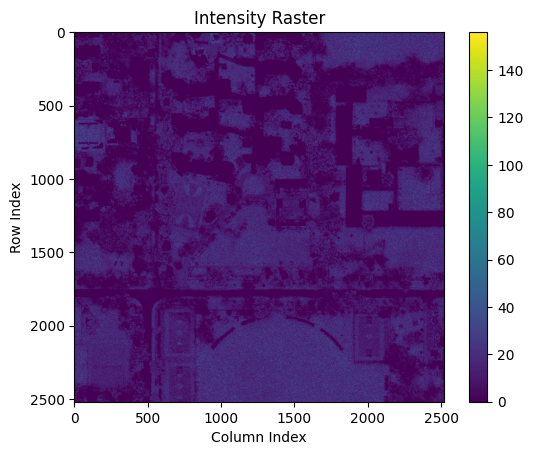

<Figure size 640x480 with 0 Axes>

In [ ]:
import numpy as np
import laspy
import rasterio
import math
import matplotlib.pyplot as plt

def las_to_intensity_tiff(las_file, tiff_file, cell_size=0.1):
    # Read the LAS file
    las = laspy.read(las_file)

    # Extract intensity values from the point cloud
    intensity = las.intensity

    # Get the point cloud coordinates
    x = las.x
    y = las.y

    # Calculate the raster dimensions based on point cloud extent
    min_x, max_x = np.min(x), np.max(x)
    min_y, max_y = np.min(y), np.max(y)
    rows = math.ceil((max_y - min_y) / cell_size)
    cols = math.ceil((max_x - min_x) / cell_size)

    # Create the intensity raster
    intensity_raster = np.zeros((rows, cols), dtype=np.uint16)

    # Calculate the row and column indices for each point in the raster
    row_indices = np.floor((y - min_y) / cell_size).astype(int)
    col_indices = np.floor((x - min_x) / cell_size).astype(int)

    # Assign the intensity values to the corresponding raster cells
    for i in range(len(intensity)):
        intensity_raster[row_indices[i], col_indices[i]] = intensity[i]

    # Write the intensity raster to a GeoTIFF file
    with rasterio.open(tiff_file, 'w', driver='GTiff', height=rows, width=cols, count=1, dtype=intensity_raster.dtype,
                       crs='EPSG:4326', transform=rasterio.transform.from_origin(min_x, max_y, cell_size, cell_size)) as dst:
        dst.write(intensity_raster, 1)

    return intensity_raster

# Example usage
las_file = "/content/drive/MyDrive/vegetation_ground.las"
tiff_file = "intensity_raster.tif"
intensity_raster = las_to_intensity_tiff(las_file, tiff_file)

# Display the intensity raster as an image
plt.imshow(intensity_raster, cmap='viridis')
plt.colorbar()
plt.title('Intensity Raster')
plt.xlabel('Column Index')
plt.ylabel('Row Index')
plt.show()

# Save the displayed image as a PNG file
plt.savefig("intensity_raster_image.png")


In [ ]:
import numpy as np
import rasterio
import math

def calculate_lai_from_intensity_tiff(intensity_tiff_file, extinction_coefficient=0.5, intensity_threshold=30):
    # Read the intensity raster from the TIFF file
    with rasterio.open(intensity_tiff_file) as src:
        intensity_raster = src.read(1)

    # Calculate the sum of canopy point intensity values above the threshold
    canopy_intensity = np.sum(intensity_raster[intensity_raster > intensity_threshold])

    # Calculate the sum of total point intensity values
    total_intensity = np.sum(intensity_raster)

    # Calculate the Intensity Ratio Index (IRI)
    iri = canopy_intensity / total_intensity
    print(f"Intensity Ratio Index (IRI): {iri}")
    # Calculate the Leaf Area Index (LAI) using the IRI and the extinction coefficient
    gap_fraction = 1 - iri
    lai = -np.log(gap_fraction) / extinction_coefficient

    return lai

# Example usage
intensity_tiff_file = "intensity_raster.tif"
lai = calculate_lai_from_intensity_tiff(intensity_tiff_file)

print(f"Leaf Area Index (LAI):")
print(lai)


Intensity Ratio Index (IRI): 0.9415822363983656
Leaf Area Index (LAI):
5.680270528275583
